![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

filename_features = "features.txt"
filename_labels = "activity_labels.txt"

filename_subtrain = "train/subject_train.txt"
filename_xtrain = "train/X_train.txt"
filename_ytrain = "train/y_train.txt"

filename_subtest = "test/subject_test.txt"
filename_xtest = "test/X_test.txt"
filename_ytest = "test/y_test.txt"

# Lendo os arquivos
features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")['nome_var']
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(filename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [66]:
%%time

pca_sem_padrao = PCA(n_components=60)
pca_sem_padrao.fit(X_train)

variancia_explicada = pca_sem_padrao.explained_variance_ratio_
print("Variância explicada por componente (sem padronização):", variancia_explicada)
variancia_acumulada = variancia_explicada.cumsum()
print("Variância acumulada (sem padronização):", variancia_acumulada)

Variância explicada por componente (sem padronização): [0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973 0.0096938  0.00858018 0.00762302 0.00672446
 0.0057942  0.00557881 0.00498926 0.00474938 0.004672   0.00431618
 0.00425715 0.00410395 0.00394002 0.00375309 0.00352427 0.00339359
 0.00332139 0.00319429 0.00301779 0.00291783 0.0028957  0.00281928
 0.00276704 0.00263395 0.00255307 0.00235866 0.00230652 0.00223648
 0.00222948 0.00210276 0.00208393 0.00204774 0.00192856 0.0018888
 0.0018118  0.00179473 0.00172328 0.00160202 0.00157039 0.00156627
 0.0015297  0.00150351 0.00145118 0.0014064  0.00136825 0.00126858
 0.00125006 0.00119742 0.0011812  0.00114995 0.00113082 0.0010967 ]
Variância acumulada (sem padronização): [0.6255444  0.67467463 0.7158893  0.73463886 0.75158746 0.76430816
 0.77607501 0.78676474 0.79645854 0.80503872 0.81266174 0.81938619
 0.82518039 0.8307592  0.83574845 0.84049783 0.84516983 0.84948601
 0.85374316 0.85784711 0.86178714 

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca_com_padrao = PCA(n_components=60)
pca_com_padrao.fit(X_scaled)

variancia_explicada_padrao = pca_com_padrao.explained_variance_ratio_
print("Variância explicada por componente (com padronização):", variancia_explicada_padrao)

variancia_acumulada_padrao = variancia_explicada_padrao.cumsum()
print("Variância acumulada (com padronização):", variancia_acumulada_padrao)

Variância explicada por componente (com padronização): [0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087 0.00860052 0.00800281
 0.00763996 0.00645329 0.00632324 0.00599722 0.0058675  0.00575407
 0.00567921 0.00527296 0.00500363 0.00488408 0.00478206 0.00468563
 0.00449289 0.00421027 0.00417979 0.0040557  0.00388524 0.00387018
 0.00365959 0.00354553 0.00347943 0.00337187 0.00329677 0.00328215
 0.00320529 0.00295615 0.00286722 0.00285075 0.00268766 0.0026562
 0.00263406 0.00258851 0.00249055 0.00246954 0.0024068  0.00236115
 0.00230279 0.00227567 0.00220165 0.00213467 0.00207704 0.00202497
 0.00199779 0.00197751 0.00194274 0.00190237 0.00188065 0.00186216]
Variância acumulada (com padronização): [0.50781172 0.57361853 0.60168289 0.62672242 0.64560527 0.66284534
 0.67655545 0.68854623 0.69850482 0.70815569 0.7167562  0.72475901
 0.73239898 0.73885227 0.74517551 0.75117273 0.75704023 0.76279431
 0.76847352 0.77374648 0.77875011 

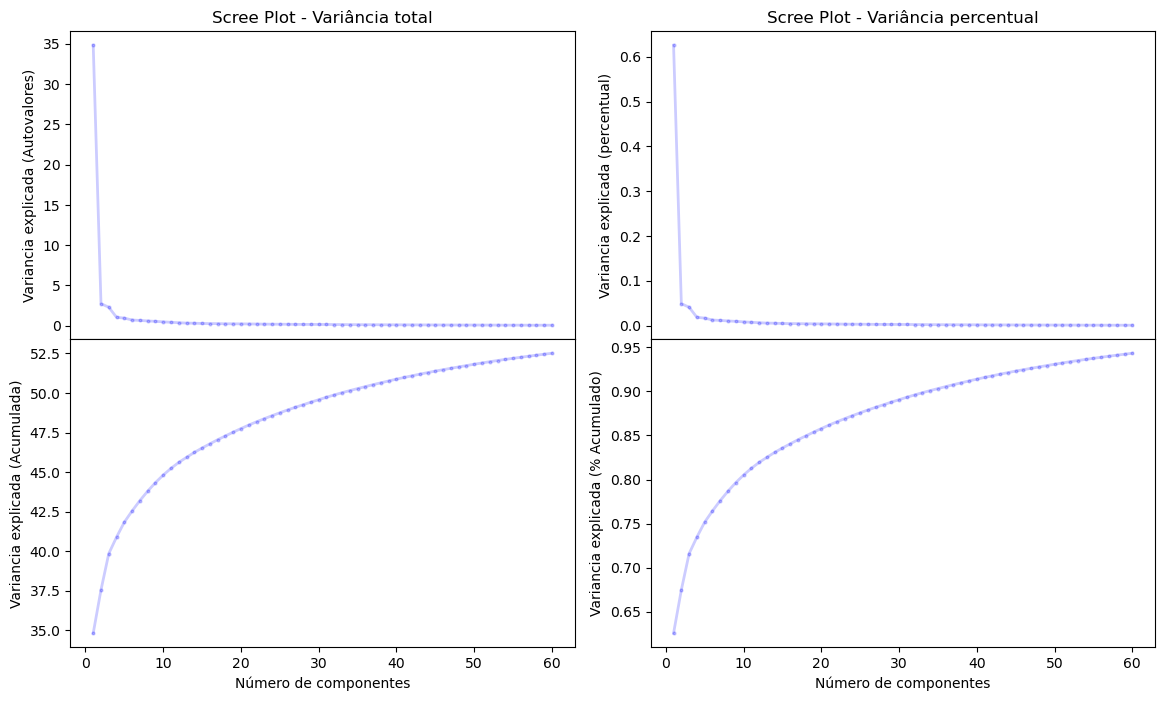

In [70]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = pca_sem_padrao.explained_variance_[0]

num_componentes = np.arange(pca_sem_padrao.n_components_) + 1
ax[0, 0].plot(num_componentes, pca_sem_padrao.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, pca_sem_padrao.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

ampli_y2 = pca_sem_padrao.explained_variance_ratio_[0]

ax[0,1].plot(num_componentes, pca_sem_padrao.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, pca_sem_padrao.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

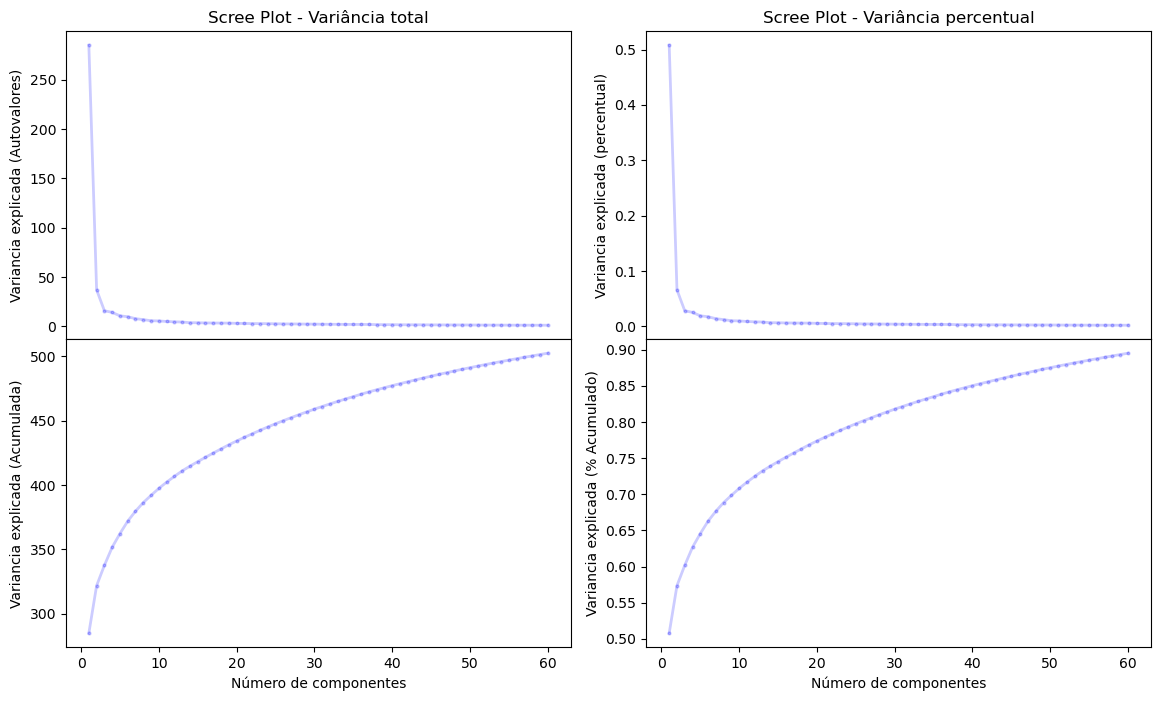

In [72]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = pca_com_padrao.explained_variance_[0]

num_componentes = np.arange(pca_com_padrao.n_components_) + 1
ax[0, 0].plot(num_componentes, pca_com_padrao.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, pca_com_padrao.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

ampli_y2 = pca_com_padrao.explained_variance_ratio_[0]

ax[0,1].plot(num_componentes, pca_com_padrao.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, pca_com_padrao.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

Para o primeiro modelos 32 componentes e para o segundo modelo 60 componentes.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [105]:
%%time


pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

modelo = DecisionTreeClassifier(ccp_alpha=0.001, random_state=45)
modelo.fit(X_train_pca, y_train)

train = modelo.predict(X_train_pca)
test = modelo.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, train)
test_accuracy = accuracy_score(y_test, test)

print(f'Acuracia do conjunto de treino: {train_accuracy:.2f}')
print(f'Acuracio do conjunto de teste: {test_accuracy:.2f}')

Acuracia do conjunto de treino: 0.89
Acuracio do conjunto de teste: 0.82
CPU times: total: 141 ms
Wall time: 219 ms


In [107]:
%%time

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_scaled_train)
X_test_pca = pca.transform(X_scaled_test)

modelo = DecisionTreeClassifier(ccp_alpha=0.001, random_state=45)
modelo.fit(X_train_pca, y_train)

train = modelo.predict(X_train_pca)
test = modelo.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, train)
test_accuracy = accuracy_score(y_test, test)

print(f'Acuracia do conjunto de treino: {train_accuracy:.2f}')
print(f'Acuracio do conjunto de teste: {test_accuracy:.2f}')

Acuracia do conjunto de treino: 0.86
Acuracio do conjunto de teste: 0.77
CPU times: total: 78.1 ms
Wall time: 253 ms


Houve uma diminuição do modelo com padronização para o modelo sem padronização.